In [1]:
using Zygote, MLJ, Plots, Images

In [2]:
gr()
X, y = make_moons(1000, noise=0, as_table = false)
Y = 2 * y .- 1;

In [3]:
sink(x, y, s) = sin(-1 * norm(x .- y) .^ 2 / s)
cas(x) = sin(x) + cos(x)
kern(x, y) = exp(cas(norm(x .- y, 3) * 5))

kern (generic function with 1 method)

In [8]:
hyperellipse(w, b, x) = ((x .- w) .^ 2)'*(b .^ -2) - 1

hyperellipse (generic function with 1 method)

In [5]:
sgdloss(w, b, x, y) = max(0, 1 - hyperellipse(w, b, x) * y)
sgdgrad(w, b, x, y) = Zygote.gradient((w, b) -> sgdloss(w, b, x, y), w, b)
inds = rand(1:1000, 30)
K = [kern(X[i, :], X[j, :]) for i in eachindex(Y), j in inds];

In [6]:
begin
    w = ones(size(K, 2))
    b = ones(size(K, 2))
    for _ in 1:100
        i = rand(1:size(K, 1))
        x = K[i, :]
        y = Y[i]
        g = sgdgrad(w, b, x, y)
        w -= 0.005 * g[1]
        b -= 0.005 * g[2]
    end
end

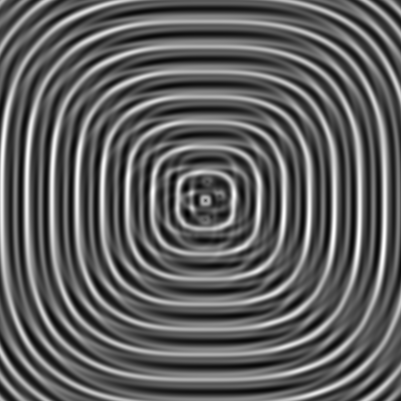

In [7]:
begin
    img = [hyperellipse(w, b, [kern([i; j], X[k, :]) for k in inds] ) for i in -10:.05:10, j in -10:.05:10]
    (img .- minimum(img)) ./ (maximum(img)  - minimum(img)) .|> Gray
end